In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
%matplotlib inline

## Hierarchical Clustering (Agglomerative)

Hierarchical clustering is a clustering technique where we create a
’hierarchy’ of clusters.

Example: App usage data, we have age and hours of app engagement
for a number of users
1 Find the two observations, which are most similar (”closest”) to
each other, and make them part of a group.
2 Find the two observations, which next closest to each other, and
make them part of another group.
3 Keep iterating until all points are assigned.

A dendrogram can be used to visualize the relationships between
observations.


In [2]:
### Continued Example: App Usage Data

age = [20, 22, 24, 24, 25, 28, 29, 34, 36, 38, 39, 41, 42, 44, 56, 57, 61, 62, 63, 63]
hours = [12, 10, 11.2, 12.3, 12.4, 13.5, 14, 8, 7, 6, 7.2, 5.6, 6.7, 6.2, 5, 4.2, 3, 2, 1]
df = pd.DataFrame(zip(age, hours), columns = ['age', 'hours'])
df.head()

,age,hours
0,20,12.0
1,22,10.0
2,24,11.2
3,24,12.3
4,25,12.4


In [3]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = None, distance_threshold = 1)

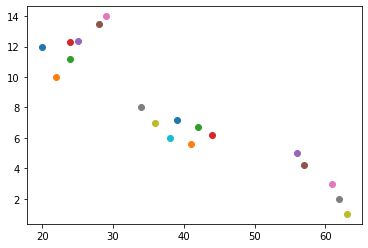

In [4]:
# fit model and predict clusters
df['clusters'] = model.fit_predict(df)

# create scatter plot for samples from each cluster
clusterval = df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(df[df['clusters']==cluster]['age'], df[df['clusters']==cluster]['hours'])
plt.show()

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

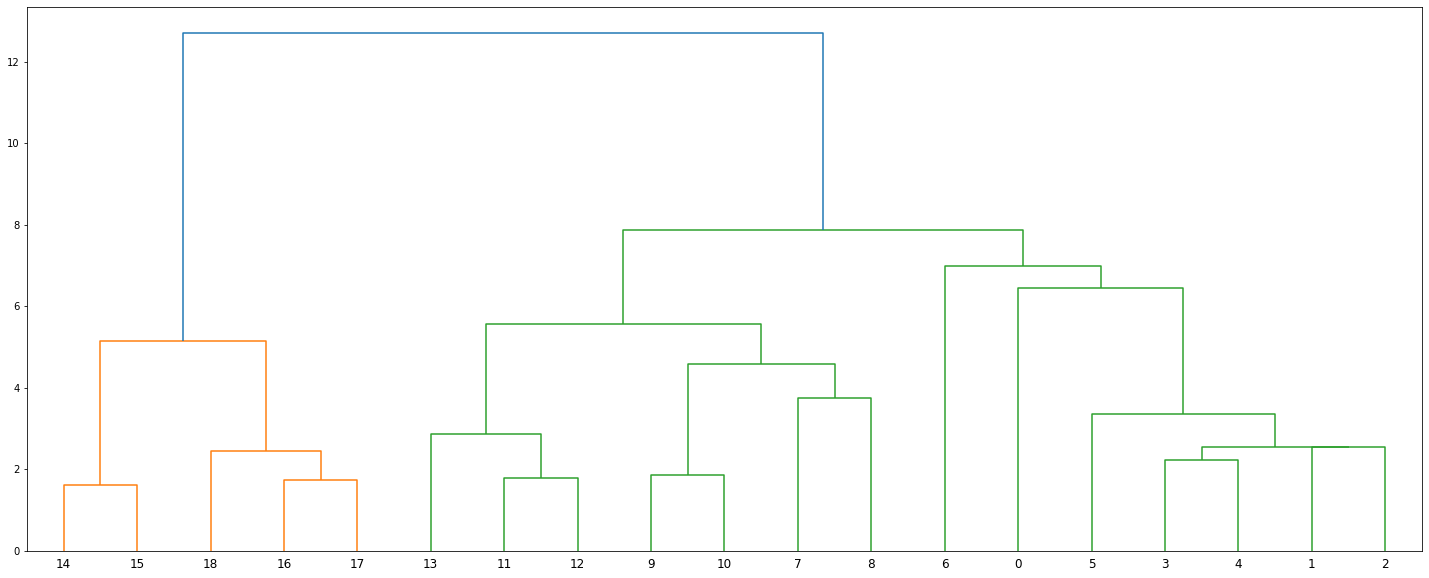

In [6]:
Z = linkage(df)
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

Text(0.5, 1.0, 'Silhouette Score for Agglomerative Clustering')

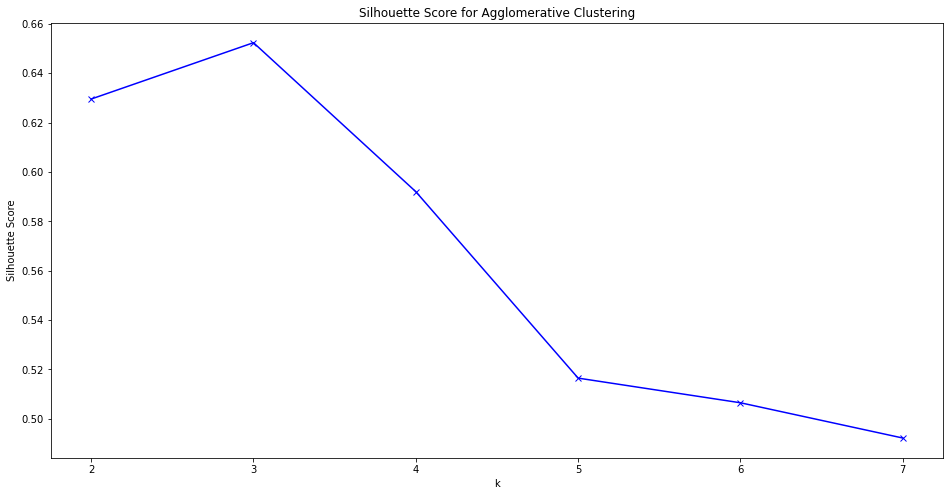

In [7]:
K = range(2, 8)
silhouette = []

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(df)
    silhouette.append(silhouette_score(df, model.fit_predict(df)))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for Agglomerative Clustering')

## Example with generated data

In [8]:
from sklearn.datasets import make_classification
help(make_classification)

Help on function make_classification in module sklearn.datasets._samples_generator:

make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
    Generate a random n-class classification problem.
    
    This initially creates clusters of points normally distributed (std=1)
    about vertices of an ``n_informative``-dimensional hypercube with sides of
    length ``2*class_sep`` and assigns an equal number of clusters to each
    class. It introduces interdependence between these features and adds
    various types of further noise to the data.
    
    Without shuffling, ``X`` horizontally stacks features in the following
    order: the primary ``n_informative`` features, followed by ``n_redundant``
    linear combinations of the informative features, followed by ``n_repeated``
    duplicates, dr

In [9]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

pd.DataFrame(X).describe()

,0,1
count,1000.000000,1000.000000
mean,-0.000778,-0.971083
std,1.157922,1.109568
min,-2.933792,-4.887411
25%,-1.041307,-1.686809
50%,0.163985,-0.986916
75%,1.015676,-0.258486
max,2.350330,3.981227


## K-Means

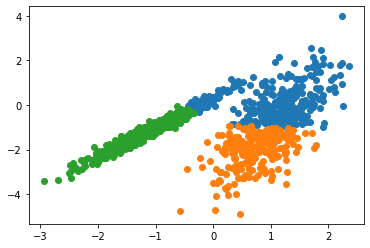

In [10]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state = 1234)
model.fit(X)

# fit model and predict clusters
X_df = pd.DataFrame(X)
X_df['clusters'] = model.fit_predict(X)
# create scatter plot for samples from each cluster
clusterval = X_df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(X_df[X_df['clusters']==cluster][0], X_df[X_df['clusters']==cluster][1])
plt.show()

Text(0.5, 1.0, 'Silhouette Score for KMeans')

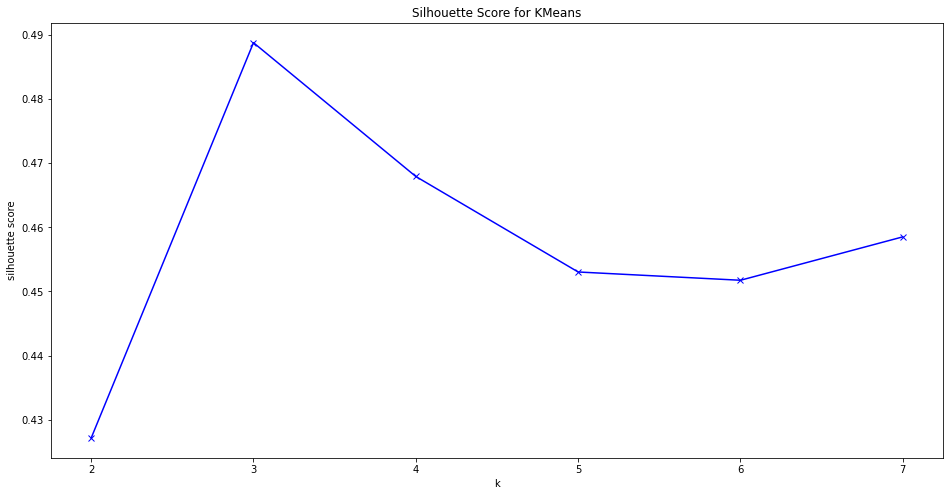

In [11]:
K = range(2, 8)
silhouette_kmeans = []

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    silhouette_kmeans.append(silhouette_score(X, model.fit_predict(X)))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette_kmeans, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for KMeans')

## Hierarchical Clustering (Agglomerative)

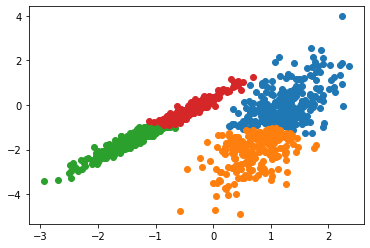

In [12]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
X_df = pd.DataFrame(X)
X_df['clusters'] = model.fit_predict(X)
# create scatter plot for samples from each cluster
clusterval = X_df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(X_df[X_df['clusters']==cluster][0], X_df[X_df['clusters']==cluster][1])
plt.show()

Text(0.5, 1.0, 'Silhouette Score for Agglomerative Clustering')

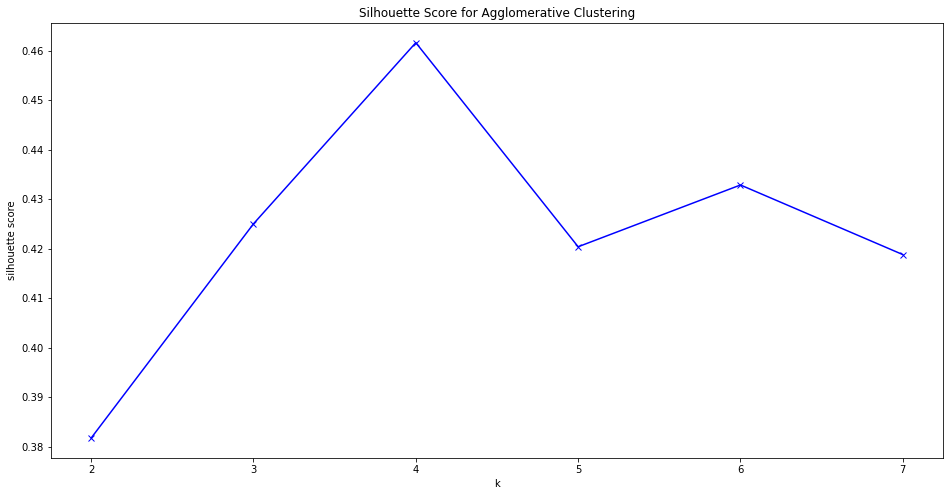

In [13]:
K = range(2, 8)
silhouette_hc = []

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(X)
    silhouette_hc.append(silhouette_score(X, model.fit_predict(X)))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, silhouette_hc, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for Agglomerative Clustering')

## DBSCAN

DBSCAN stands for ’Density Based Spatial Clustering of Applications
with Noise’. This clustering algorithm starts by picking a random point
from the dataset, and defining what is called a ’neighborhood’.

Algorithm counts how many points are inside the ’neighborhood’ of
the chosen point and if there are more than a minimum number of
points (chosen as a parameter of the the algorithm), these points
are determined to be of the same cluster as the chosen point.
If there are not enough points in the neighborhood to reach the
minimum, the chosen point is marked as ’noise’, and as not
belonging to a cluster.



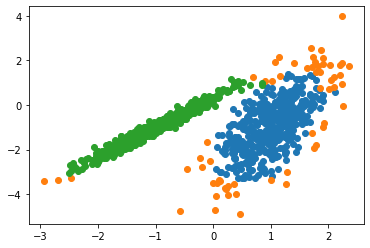

In [14]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3, min_samples=10)

# fit model and predict clusters
X_df = pd.DataFrame(X)
X_df['clusters'] = model.fit_predict(X)
# create scatter plot for samples from each cluster
clusterval = X_df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(X_df[X_df['clusters']==cluster][0], X_df[X_df['clusters']==cluster][1])
plt.show()

{0, 1, 2, 3, 4, 5, 6, -1}
{0, 1, 2, 3, 4, 5, 6, 7, 8, -1}
{0, 1, 2, 3, -1}
{0, 1, 2, -1}
{0, 1, 2, -1}
{0, 1, -1}
{0, -1}
{0, -1}
[0.1, 0.12, 0.15, 0.18, 0.2, 0.3, 0.4, 0.5]
[8, 10, 5, 4, 4, 3, 2, 2]
[-0.23929205731297043, -0.07744654039359893, 0.07019751684012232, 0.265085360873157, 0.25643691416479014, 0.4157241178607082, 0.4613474365032591, 0.4831114571736628]


Text(0.5, 1.0, 'Silhouette Score for Agglomerative Clustering')

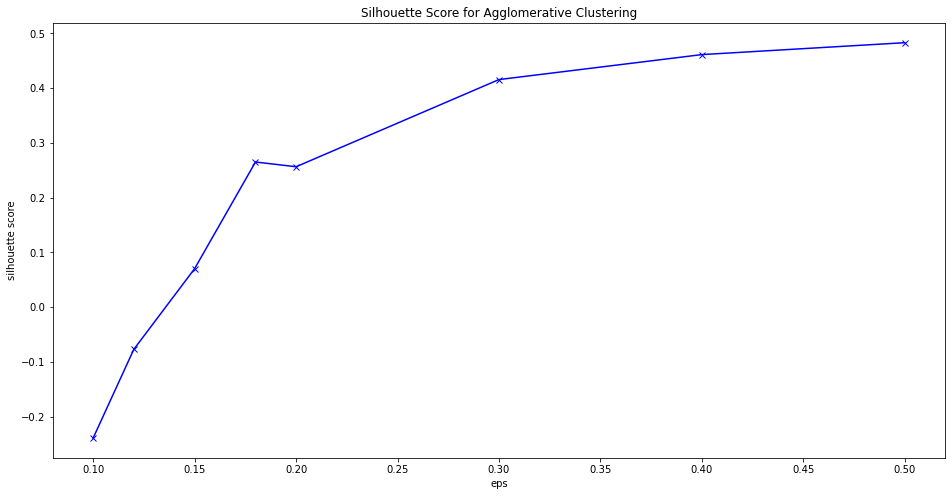

In [15]:
eps_vector = [0.1, 0.12, 0.15, 0.18, 0.2, 0.3, 0.4, 0.5]
silhouette_dbs = []
n_clusters = []

for e in eps_vector:
    model = DBSCAN(eps = e, min_samples=10)
    clusters = set(model.fit_predict(X))
    n_clusters.append(len(clusters))
    print(clusters)
    model.fit(X)
    silhouette_dbs.append(silhouette_score(X, model.fit_predict(X)))

print(eps_vector)
print(n_clusters)  
print(silhouette_dbs)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(eps_vector, silhouette_dbs, 'bx-')
plt.xlabel('eps')
plt.ylabel('silhouette score')
plt.title('Silhouette Score for Agglomerative Clustering')

## Evaluating Unsupervised Learning Algorithms

In most cases, we do not have a source of truth!

In [16]:
model = KMeans(n_clusters=5)
clusters = model.fit_predict(X)
print(silhouette_score(X, clusters))

0.4536314494166543


In [17]:
model = AgglomerativeClustering(n_clusters=5)
clusters = model.fit_predict(X)
print(silhouette_score(X, clusters))

0.42037434920081196


In [18]:
model = DBSCAN(eps = 0.2, min_samples=10)
clusters = model.fit_predict(X)
print(silhouette_score(X, clusters))

0.25643691416479014


## PCA

In [19]:
from sklearn import datasets
X_pca = datasets.load_diabetes()['data']
pd.DataFrame(X_pca)

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [20]:
from sklearn.decomposition import PCA

help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 | 

In [21]:
pca = PCA()
pca.fit(X_pca)
components = pca.transform(X_pca)
print(pd.DataFrame(components))

            0         1         2         3         4         5         6  \
0    0.027931 -0.092601  0.028027 -0.003939 -0.012207 -0.048099 -0.008553   
1   -0.134686  0.065263  0.001328 -0.022356 -0.006813 -0.048184  0.010674   
2    0.012945 -0.077764  0.035164 -0.037647 -0.055357 -0.052931 -0.021994   
3    0.002345  0.018182 -0.095750  0.065318  0.012154  0.021181  0.022933   
4   -0.035981  0.038621 -0.002724 -0.006541 -0.006343 -0.038746  0.020760   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.058958 -0.049275  0.044173 -0.031215  0.009718 -0.022801  0.018761   
438  0.060155  0.036211 -0.083249 -0.053914 -0.004472  0.046301 -0.055821   
439 -0.009763 -0.057337  0.023596 -0.064372 -0.006739 -0.002154 -0.030225   
440  0.032956  0.009994 -0.041321  0.076903  0.005691 -0.026489  0.025956   
441 -0.090561  0.189108 -0.002301 -0.010493  0.028531  0.078345  0.011666   

            7         8         9  
0    0.036028 -0.008613 -0.002329  
1  

In [22]:
round(pd.DataFrame(pca.explained_variance_ratio_), 5)

,0
0,0.40242
1,0.14923
2,0.12060
3,0.09555
4,0.06622
5,0.06027
6,0.05366
7,0.04337
8,0.00783
9,0.00086


In [23]:
round(pd.DataFrame(components).corr(), 3)

,0,1,2,3,4,5,6,7,8,9
0,1.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
1,-0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0
2,0.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
3,0.0,-0.0,0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,0.0
4,-0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,0.0,-0.0,0.0
5,-0.0,0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0
6,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0
7,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,0.0
8,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0
9,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,1.0


In [24]:
round(pd.DataFrame(X_pca).corr(), 2)

,0,1,2,3,4,5,6,7,8,9
0,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30
1,0.17,1.00,0.09,0.24,0.04,0.14,-0.38,0.33,0.15,0.21
2,0.19,0.09,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39
3,0.34,0.24,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39
4,0.26,0.04,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33
5,0.22,0.14,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29
6,-0.08,-0.38,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27
7,0.20,0.33,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42
8,0.27,0.15,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46
9,0.30,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00
